# Metric Analysis

Version 1.0

(C) 2020 - Umberto Michelucci, Michela Sperti

This notebook is part of the book _Applied Deep Learning: a case based approach, **2nd edition**_ from APRESS by [U. Michelucci](mailto:umberto.michelucci@toelt.ai) and [M. Sperti](mailto:michela.sperti@toelt.ai).

The purpose of this notebook is to show you a practical example (with a dataset taken from the real world) of metric analysis, very often called error analysis. 

## Notebook Learning Goals

At the end of the notebook you are going to see how to obtain fundamental information on how your model is doing and on how good your data is. We will do this by evaluating your optimizing metric on a set of different datasets that you can derive from your data.

## Dataset Overview

For our example, we will use the MNIST dataset. You can find more information in the [References](#rf) section of the notebook.

The MNIST database is a large database of handwritten digits that we can use to
train our model. The MNIST database contains 70000 images. 

“The original black and white (bilevel) images from MNIST were normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the
image so as to position this point at the center of the 28x28 field” (see [References](#rf)).

Our features will be the gray value for each pixel, so we will have 28x28 = 784 features whose values will go from 0 to 255 (gray values). 

The dataset contains all ten digits, from 0 to 9. With the following code, you can prepare the data to use in the sections below.

## Libraries and Dataset Import

This section contains the necessary libraries (such as tensorflow or pandas) you need to import to run the notebook.

In [1]:
# This command install code from the tensorflow docs repository.
# We need to use tensorflow_docs.modeling function when training our model.
# This function will generate a report on the network's perfomances
# step by step during the training phase (see Training Phase section of the
# notebook). 

# You can safely ignore this cell if you don't understand what it does.

!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-kh5rq11p
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-kh5rq11p
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=155935 sha256=806964890cfafa4ca7983f5115878d8473b5d9695b3bfa92b4a69e68ddebdb7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ysxh2i5z/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [2]:
# general libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# sklearn libraries
from sklearn.metrics import confusion_matrix

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [3]:
# Referring to the following cell, if you want to re-clone a repository
# inside the google colab instance, you need to delete it first. 
# You can delete the repositories contained in this instance executing 
# the following two lines of code (deleting the # comment symbol).

# !rm -rf ADL-Book-2nd-Ed

In [4]:
# This command actually clone the repository of the book in the google colab
# instance. In this way this notebook will have access to the modules
# we have written for this book.

# Please note that in case you have already run this cell, and you run it again
# you may get the error message:
#
# fatal: destination path 'ADL-Book-2nd-Ed' already exists and is not an empty directory.
# 
# In this case you can safely ignore the error message.

!git clone https://github.com/toelt-llc/ADL-Book-2nd-Ed.git

Cloning into 'ADL-Book-2nd-Ed'...
remote: Enumerating objects: 1880, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 1880 (delta 4), reused 24 (delta 3), pack-reused 1848
Receiving objects: 100% (1880/1880), 612.76 MiB | 35.43 MiB/s, done.
Resolving deltas: 100% (933/933), done.
Checking out files: 100% (591/591), done.


In [5]:
# This cell imports some custom written functions that we have created to 
# make the plotting easier. You don't need to undertsand the details and 
# you can simply ignore this cell.
# Simply run it with CMD+Enter (on Mac) or CTRL+Enter (Windows or Ubuntu) to
# import the necessary functions.

import sys
sys.path.append('ADL-Book-2nd-Ed/modules/')

from style_setting import set_style

The following cells are needed to **download** the dataset.

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Now you have all the necessary elements to successfully implement this tutorial. **Let's have a look at our data**:

In [7]:
print('Dimensions of the training dataset: ', x_train.shape)
print('Dimensions of the test dataset: ', x_test.shape)
print('Dimensions of the training labels: ', y_train.shape)
print('Dimensions of the test labels: ', y_test.shape)

Dimensions of the training dataset:  (60000, 28, 28)
Dimensions of the test dataset:  (10000, 28, 28)
Dimensions of the training labels:  (60000,)
Dimensions of the test labels:  (10000,)


It is useful to define a function to visualize the digits, to get an idea of how they look.

In [8]:
def plot_digit(some_digit):
  plt.imshow(some_digit, cmap = matplotlib.cm.binary, interpolation = "nearest")
  plt.axis("off")
  plt.savefig('Figure10-7.png', dpi = 300)
  plt.show()

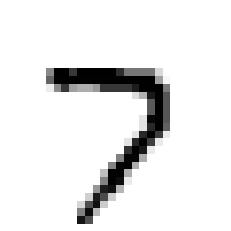

In [9]:
plot_digit(x_train[36003])

The $36003^{rd}$ digit in the training dataset. It is easly recognizable as a 7.

## Dataset Analysis

Now `x_train` and `x_test` contain the input images and `y_train` and `y_test` the target labels (remember that the value we want to predict is called target in machine-learning jargon). Just typing `x_train.shape` will give you the shape of `x_train`: `(60000, 28, 28)`. Note that `x_train` has 60000 rows (each row is an image) made of 28x28 pixels (each pixel gray value is a feature). 

Let’s check how many digits we have in our training and test dataset.

**Training dataset**

In [10]:
for i in range(10):
  print("digit", i, "appears", np.count_nonzero(y_train == i), "times")

digit 0 appears 5923 times
digit 1 appears 6742 times
digit 2 appears 5958 times
digit 3 appears 6131 times
digit 4 appears 5842 times
digit 5 appears 5421 times
digit 6 appears 5918 times
digit 7 appears 6265 times
digit 8 appears 5851 times
digit 9 appears 5949 times


In [11]:
for i in range(10):
    print ("digit", i, "makes", np.around(np.count_nonzero(y_train == i)/60000.0*100.0, decimals = 1), "% of the 60000 observations")

digit 0 makes 9.9 % of the 60000 observations
digit 1 makes 11.2 % of the 60000 observations
digit 2 makes 9.9 % of the 60000 observations
digit 3 makes 10.2 % of the 60000 observations
digit 4 makes 9.7 % of the 60000 observations
digit 5 makes 9.0 % of the 60000 observations
digit 6 makes 9.9 % of the 60000 observations
digit 7 makes 10.4 % of the 60000 observations
digit 8 makes 9.8 % of the 60000 observations
digit 9 makes 9.9 % of the 60000 observations


**Test dataset** 

In [12]:
for i in range(10):
  print("digit", i, "appears", np.count_nonzero(y_test == i), "times")

digit 0 appears 980 times
digit 1 appears 1135 times
digit 2 appears 1032 times
digit 3 appears 1010 times
digit 4 appears 982 times
digit 5 appears 892 times
digit 6 appears 958 times
digit 7 appears 1028 times
digit 8 appears 974 times
digit 9 appears 1009 times


In [13]:
for i in range(10):
    print ("digit", i, "makes", np.around(np.count_nonzero(y_test == i)/10000.0*100.0, decimals = 1), "% of the 10000 observations")

digit 0 makes 9.8 % of the 10000 observations
digit 1 makes 11.4 % of the 10000 observations
digit 2 makes 10.3 % of the 10000 observations
digit 3 makes 10.1 % of the 10000 observations
digit 4 makes 9.8 % of the 10000 observations
digit 5 makes 8.9 % of the 10000 observations
digit 6 makes 9.6 % of the 10000 observations
digit 7 makes 10.3 % of the 10000 observations
digit 8 makes 9.7 % of the 10000 observations
digit 9 makes 10.1 % of the 10000 observations


## Dataset Preparation

We reshape and normalize the data. We need to reshape the data since the network requires specific dimensions as input (in particular, a flatten array where the 28x28 pixels are put into a single flat array of 784 pixels).

In [14]:
x_train_reshaped = x_train.reshape(60000, 784)
x_test_reshaped = x_test.reshape(10000, 784)

In [15]:
x_train_normalised = x_train_reshaped/255.0
x_test_normalised = x_test_reshaped/255.0

## Model Building

Then we build our network with one single neuron.

In [16]:
def build_model():

  # one unit as network's output
  # sigmoid function as activation function
  # sequential groups a linear stack of layers into a tf.keras.Model
  # activation parameter: if you don't specify anything, no activation 
  # is applied (i.e. "linear" activation: a(x) = x).
  model = keras.Sequential([ 
    layers.Dense(1, input_shape = [784], activation = 'sigmoid')
  ])

  # optimizer that implements the Gradient Descent algorithm
  optimizer = tf.keras.optimizers.SGD(momentum = 0.0, learning_rate = 0.0001)

  # the compile() method takes a metrics argument, which can be a list of metrics
  # loss = cross-entropy, metrics = accuracy,
  model.compile(loss = 'binary_crossentropy',
                optimizer = optimizer,
                metrics = ['binary_crossentropy','binary_accuracy'])
  
  return model

## Unbalanced Class Distribution

We now create a new label in this way: we assign to all observations for the digit zero the label 0, and to all other digits (1,2,3,4,5,6,7,8 and 9) the label 1 with the following code

In [37]:
y_train_unbalanced = np.zeros_like(y_train)
y_train_unbalanced[np.any([y_train == 1], axis = 0)] = 0
y_train_unbalanced[np.any([y_train != 1], axis = 0)] = 1

In [38]:
y_test_unbalanced = np.zeros_like(y_test)
y_test_unbalanced[np.any([y_test == 1], axis = 0)] = 0
y_test_unbalanced[np.any([y_test != 1], axis = 0)] = 1

In [39]:
print(np.sum(y_train_unbalanced == 0))
print(np.sum(y_train_unbalanced == 1))

6742
53258


Now the arrays `y_train_unbalanced` and `y_test_unbalanced` will contain the new labels. Note that now the dataset is heavily unbalanced. Label 0 appears roughly 10% of the cases, while label 1 appears 90% of the cases. 

We now run the model to see which performance we can get.

In [40]:
model = build_model()

In [44]:
EPOCHS = 50

history = model.fit(
  x_train_normalised, y_train_unbalanced,
  epochs = EPOCHS, verbose = 0, batch_size = 1000,
  callbacks = [tfdocs.modeling.EpochDots()])


Epoch: 0, binary_accuracy:0.7599,  binary_crossentropy:0.5829,  loss:0.5829,  
..................................................

In [45]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,binary_crossentropy,binary_accuracy,epoch
45,0.292092,0.292092,0.887617,45
46,0.290531,0.290531,0.887633,46
47,0.289016,0.289016,0.887633,47
48,0.287542,0.287542,0.887633,48
49,0.286109,0.286109,0.887633,49


In [49]:
x_train_normalised.shape

print(6742+53258)

60000


In [46]:
train_predictions = model.predict(x_train_normalised).flatten()
confusion_matrix(y_train_unbalanced, train_predictions > 0.5)

array([[    0,  6742],
       [    0, 53258]])

Should be easy to see now that our model predicts effectively almost all observations to be in class 1 (a total of 950+53869 = 54819).  The number of correct classified observations is 4973 (for class 0) and 53869 (for class 1), for a total of 58842 observations. Since we have a total of 60000 observations in our training set, we get an accuracy of 58842/60000 = 0.98, as our Keras code above told us. But not because our model is good, simply because it has effectively classified all observations in class 1. We don't need a neural network in this case to reach this accuracy. What happens is that our model sees observations belonging to class 0 so rarely that they almost don't influence the learning, that is dominated by the observations in class 1.

## Datasets with Different Distributions

Let us consider the subset of the MNIST dataset made of the two digits: 1 and 2. We will build two different datasets coming from a different distribution, one taking the test set as it is and another one shifting the test set images 10 pixels to the right. We will train our model on the images as they are in the original dataset and apply the model to images shifted 10 pixels to the right as well as to the original ones and see what happens. 

In [ ]:
x_train_12 = x_train[np.any([y_train == 1, y_train == 2], axis = 0)]
x_test_12 = x_test[np.any([y_test == 1, y_test == 2], axis = 0)]
y_train_12 = y_train[np.any([y_train == 1, y_train == 2], axis = 0)]
y_test_12 = y_test[np.any([y_test == 1, y_test == 2], axis = 0)]

In [ ]:
x_train_normalised = x_train_12/255.0
x_test_normalised = x_test_12/255.0

In [ ]:
x_train_normalised = x_train_normalised.reshape(x_train_normalised.shape[0], 784)
x_test_normalised = x_test_normalised.reshape(x_test_normalised.shape[0], 784)

We shift the labels to have 0 and 1.

In [ ]:
y_train_bin = y_train_12 - 1
y_test_bin = y_test_12 - 1

The following code shifts each image of the test dataset to the right of 10 pixels. 

In [ ]:
x_test_shifted = np.zeros_like(x_test_normalised)
for i in range(x_test_normalised.shape[0]):
    tmp = x_test_normalised[i,:].reshape(28,28)
    tmp_shifted = np.zeros_like(tmp)
    tmp_shifted[:,10:28] = tmp[:,0:18]
    x_test_shifted[i,:] = tmp_shifted.reshape(784)

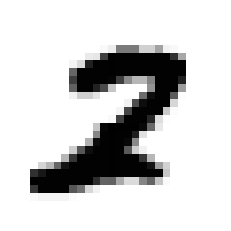

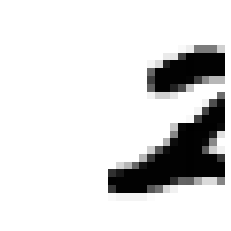

In [ ]:
plot_digit(x_test_12[2000])
plot_digit(x_test_shifted[2000].reshape(28,28))

Now let us build a network with a single neuron and let us see what happens. 

In [ ]:
model = build_model()

In [ ]:
EPOCHS = 100

history = model.fit(
  x_train_normalised, y_train_bin,
  epochs = EPOCHS, verbose = 0,
  callbacks = [tfdocs.modeling.EpochDots()])


Epoch: 0, binary_accuracy:0.5609,  binary_crossentropy:0.6886,  loss:0.6886,  
....................................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,binary_crossentropy,binary_accuracy,epoch
95,0.125293,0.125293,0.977559,95
96,0.124628,0.124628,0.977559,96
97,0.123975,0.123975,0.977559,97
98,0.123333,0.123333,0.977717,98
99,0.122701,0.122701,0.977638,99


In [ ]:
_, _, train_accuracy = model.evaluate(x_train_normalised, y_train_bin)
_, _, test_accuracy = model.evaluate(x_test_normalised, y_test_bin)
_, _, shifted_test_accuracy = model.evaluate(x_test_shifted, y_test_bin)

68/68 [==============================] - 0s 1ms/step - loss: 0.7080 - binary_crossentropy: 0.7080 - binary_accuracy: 0.5427


In [ ]:
print('The accuracy on the training set is equal to: ', int(train_accuracy*100), '%.')
print('The accuracy on the test set is equal to: ', int(test_accuracy*100), '%.')
print('The accuracy on the shifted test set is equal to: ', int(shifted_test_accuracy*100), '%.')

The accuracy on the training set is equal to:  97 %.
The accuracy on the training set is equal to:  98 %.
The accuracy on the training set is equal to:  54 %.


We get the following results after 100 epochs
- For the training dataset we get 97%
- For the test dataset (as it is in the original dataset) we get 98%
- For the shifted test set we get 54%. A very bad result.

What has happened is that the model has learned from a dataset where all images are centered in the box and therefore could not generalize well to images shifted and no more centered. When training a model on a dataset, you will get good results usually on observations that are like the ones in the training set. 

Therefore, **you need to pay great attention to check if the data present in your training and test datasets comes from the same distribution**.


 ## K-fold cross-validation

We will now see another technique that is very powerful and should be known by any machine learning practitioner (not only in the deep learning world): **k-fold cross validation**. The technique is a way of finding a solution to the following two problems:
1. What to do when your dataset is too small to split it in a train and dev/test set? 
2. How to get information on the variance of your metric? 

The technique pseudo-code is the following:
1. Partition your complete dataset in $k$ equally big subsets: $f_1$, $f_2$, …,$f_k$. The subsets are also called *folds*. Normally the subsets are not overlapping, that means that each observation appears in one and only one fold.
2. For i going from 1 to $k$: 
- Train your model on all the folds except $f_i$
- Evaluate your metric on the fold $f_i$. The fold $f_i$ will be the test set in iteration $i$
3. Evaluate the average and variance of your metric on the $k$ results


Now let us create 10 arrays, each containing a list of indexes that we will use to select images. We will use the training dataset to perform k-fold crossvalidation (so we will divide the training dataset into 10 parts).

In [ ]:
foldnumber = 10
idx = np.arange(0, x_train_12.shape[0])
np.random.shuffle(idx)
al = np.array_split(idx, foldnumber)

In [ ]:
x_train_reshaped = x_train_12.reshape(x_train_12.shape[0], 784)

Now let us create the arrays containing the images.

In [ ]:
x_train_inputfold = []
y_train_inputfold = []
for i in range(foldnumber):
    tmp = x_train_reshaped[al[i],:]
    x_train_inputfold.append(tmp)
    ytmp = y_train_bin[al[i]]
    y_train_inputfold.append(ytmp)

    
x_train_inputfold = np.asarray(x_train_inputfold)
y_train_inputfold = np.asarray(y_train_inputfold)

Let us check for fold 0 (you can do the same check for the others) how many 0 and 1 are contained in the fold itself.

In [ ]:
total = 0
for i in range(0,2,1):
    print ("digit", i, "makes", np.around(np.count_nonzero(y_train_inputfold[0] == i)/1270.0*100.0, decimals=1), "% of the 1270 observations")

digit 0 makes 51.7 % of the 1270 observations
digit 1 makes 48.3 % of the 1270 observations


In [ ]:
x_train_inputfold_normalized = np.zeros_like(x_train_inputfold, dtype = float)
for i in range (foldnumber):
    x_train_inputfold_normalized[i] = x_train_inputfold[i]/255.0

In [ ]:
X_train = x_train_inputfold_normalized
y_train = y_train_inputfold

Now we are ready to build our network. We will use a one-neuron network for logistic regression, with the sigmoid activation function. At this point we will need to iterate through the folds. Remember our pseudo code at the beginning? Select one fold as test set and train the model on all other folds concatenated. Proceed in this way for all the folds. The code could look like this (is a bit long, so take a few minutes to understand it).

In [ ]:
train_acc = []
dev_acc = []

for i in range(foldnumber): # STEP 1
    
    # Prepare the folds - STEP 2
    lis = []
    ylis = []
    for k in np.delete(np.arange(foldnumber), i):
        lis.append(X_train[k])
        ylis.append(y_train[k])
        X_train_ = np.concatenate(lis, axis = 0)
        y_train_ = np.concatenate(ylis, axis = 0)
    X_train_ = np.asarray(X_train_)
    y_train_ = np.asarray(y_train_)
    
    X_dev_ = X_train[i]
    y_dev_ = y_train[i]
    
    # STEP 3
    print('Dev fold is', i)

    model = build_model()

    EPOCHS = 500

    history = model.fit(
      X_train_, y_train_,
      epochs = EPOCHS, verbose = 0,
      callbacks = [tfdocs.modeling.EpochDots()])
    
    # STEP 4
    _, _, train_accuracy = model.evaluate(X_train_, y_train_)
    print('Dev accuracy:', int(train_accuracy*100), '%.')
    train_acc = np.append(train_acc, train_accuracy)

    _, _, dev_accuracy = model.evaluate(X_dev_, y_dev_)
    print('Dev accuracy:', int(dev_accuracy*100), '%.')
    dev_acc = np.append(dev_acc, dev_accuracy)

Dev fold is 0

Epoch: 0, binary_accuracy:0.7542,  binary_crossentropy:0.6009,  loss:0.6009,  
....................................................................................................
Epoch: 100, binary_accuracy:0.9747,  binary_crossentropy:0.1298,  loss:0.1298,  
....................................................................................................
Epoch: 200, binary_accuracy:0.9800,  binary_crossentropy:0.0937,  loss:0.0937,  
....................................................................................................
Epoch: 300, binary_accuracy:0.9829,  binary_crossentropy:0.0786,  loss:0.0786,  
....................................................................................................
Epoch: 400, binary_accuracy:0.9839,  binary_crossentropy:0.0700,  loss:0.0700,  
358/358 [==============================] - 1s 1ms/step - loss: 0.0643 - binary_crossentropy: 0.0643 - binary_accuracy: 0.9844
Dev accuracy: 98 %.
40/40 [=========================

The code follows the steps:
1.	Do a loop over all the folds (in this case from 1 to 10) iterating with the variable $i$ from 0 to 9
2.	For each $i$ use the fold $i$ as the dev set and concatenate all other folds and use the result as train set. 
3.	For each $i$ train the model
4.	For each $i$ evaluate the accuracy on the two datasets (train and dev) and save the values in the two lists: `train_acc` and `dev_acc`.


It is very instructive to study how the accuracy values are distributed. Since we have 10 folds, we have 10 values to study. Below you can see the distribution of the values for the train set (left plot) and for the dev set (right plot).



In [ ]:
# The following line contains the path to fonts that are used to plot result in
# a uniform way.

f = set_style().set_general_style_parameters()

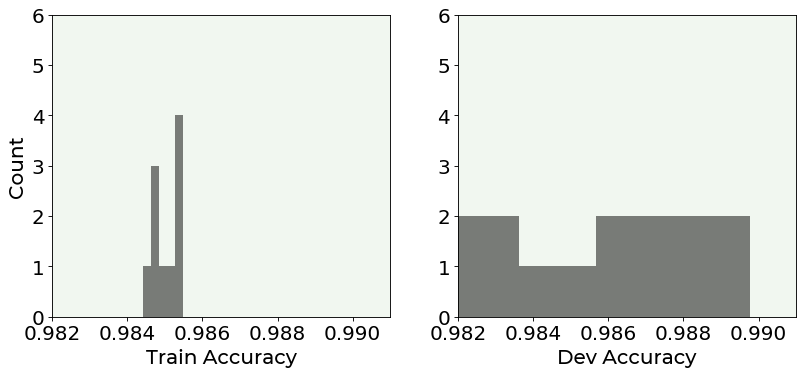

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)
plt.hist(train_acc, bins = 5, color = 'black', alpha = 0.5)
ax.set_ylim(0,6)
ax.set_xlim(0.982,0.991)
ax.set_xlabel('Train Accuracy', fontproperties = fm.FontProperties(fname = f))
ax.set_ylabel('Count', fontproperties = fm.FontProperties(fname = f))

ax = fig.add_subplot(122)
ax.set_ylim(0,6)
ax.set_xlim(0.982,0.991)
plt.hist(dev_acc, bins = 5, color = 'black', alpha = 0.5)
ax.set_xlabel('Dev Accuracy', fontproperties = fm.FontProperties(fname = f))

plt.savefig('./Figure10-9.png', dpi = 300)
plt.show()

The image is quite instructive. You can see that the accuracy values for the training set are quite concentrated around the average, while the ones evaluated on the dev set are much more spread! This shows how the model on new data behave less well than on the data it has trained on. 

## Exercises

1. [*Easy Difficulty*] Perform k-fold cross-validation using the built-in function of `sklearn` library and compare results.
2. [*Medium Difficulty*] Look at different performance metrics (for example sensitivity, specificity, ROC curve, etc.) and calculate them for the unbalanced class problem, trying to understand how these can help you in the evaluation of the models.

## References <a name = "rf"></a>

1. http://yann.lecun.com/exdb/mnist/ (dataset explanation)
